In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np

from pymongo import MongoClient

In [3]:
sample_sizes = (500, 1000, 1500)
classifiers = ('svc', 'xgb', 'softmax')

In [4]:
mc = MongoClient()
db = mc['sacred']

In [5]:
results = []
for clf in classifiers:
    clf_mean = []
    clf_std = []
    for sample_size in sample_sizes:
        test_accuracy = []
        for seed in range(1, 11):
            result = db['runs'].find_one({'experiment.name': 'mnist_sampled',
                                 'config.classifier': clf,
                                 'config.sample_size': sample_size,
                                 'config.seed': seed,
                                 'status': 'COMPLETED'},
                                {'result': 1})
            test_accuracy.append(result['result']['test_accuracy'])
        clf_mean.append(np.mean(test_accuracy))
        clf_std.append(np.std(test_accuracy))
    results.append((clf_mean, clf_std))

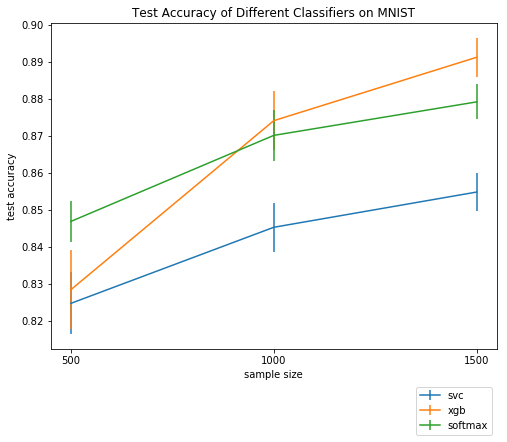

In [6]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))

ax.set_title('Test Accuracy of Different Classifiers on MNIST')
ax.set_xlabel('sample size')
ax.set_ylabel('test accuracy')

xticks = np.arange(len(sample_sizes))
ax.set_xticks(xticks)
ax.set_xticklabels(sample_sizes)

for i, clf in enumerate(classifiers):
    ax.errorbar(xticks, results[i][0], yerr=results[i][1], label=clf)
ax.legend(bbox_to_anchor=(1, -0.1))
    
plt.show()